# Machine Learning Assignment 1

Daniel Devlin | 19202103 | daniel.devlin1@ucdconnect.ie

### Imports

In [332]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

## Pre-Tasks Analysis of Pulsar Star Dataset

In [266]:
# Reading in CSV and creating first dataframe(df)
df = pd.read_csv('pulsar_star_19202103.csv')
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,114.859375,41.452672,0.188914,0.591629,2.579431,16.024319,9.183242,105.904593,0.0
1,98.406250,51.290752,0.421885,-0.158079,3.683946,23.996595,7.378554,57.771480,0.0
2,110.359375,42.741544,NaN,0.538841,3.418896,19.090287,7.527202,67.811225,0.0
3,133.960938,48.455908,-0.289046,0.093911,1.377090,11.289180,13.631908,NaN,0.0
4,100.109375,44.539350,0.441861,0.350467,8.473244,32.343502,4.532549,22.332795,0.0
...,...,...,...,...,...,...,...,...,...
9995,122.976562,48.277108,-0.027160,-0.080098,5.120401,28.763490,5.867339,34.484277,0.0
9996,110.257812,58.110784,0.132559,-0.750325,2.829431,18.674093,9.247513,98.431192,0.0
9997,113.062500,48.387716,0.019552,-0.362260,0.352843,8.201329,27.385053,804.482706,0.0
9998,123.765625,41.959706,-0.120701,0.379044,7.254181,35.665727,4.990392,24.090195,0.0


We have read in our personal dataset(Student Number: 19202103) and we can see there are 10000 rows (detected signals) and 9 columns (8 descriptive features and the target feature).

In [267]:
# Describing the dataframe to identify trends of each column
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,10000.000000,10000.000000,8595.000000,10000.000000,10000.000000,9056.000000,10000.000000,9517.000000,10000.000000
mean,111.103095,46.509434,0.477388,1.779757,12.671227,26.313198,8.345170,105.928268,0.091200
std,25.640401,6.798077,1.066709,6.224056,29.658471,19.643677,4.524510,107.072212,0.287908
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-2.812353,-1.976976,0.000000
25%,101.076172,42.362222,0.025565,-0.188029,1.906355,14.394279,5.826037,35.626671,0.000000
50%,115.128906,46.933947,0.223402,0.207047,2.775502,18.299766,8.467912,83.571656,0.000000
75%,127.015625,50.970903,0.473025,0.924850,5.396321,28.244943,10.736560,140.455040,0.000000
max,189.734375,91.808628,8.069522,68.101622,211.948997,110.642211,34.539844,1191.000837,1.000000


## Task 1: Implementing Data Quality Plan

### Identifying Issues with Dataset

In [268]:
# Check Data Types of all Columns
df.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                     float64
dtype: object

We can see above that all columns have the same datatype of **float64**, so no changes need to be made there. 

In [269]:
# Check for Missing Values
missing = df.isnull().sum(axis=1)
rows_with_missing_values = (missing > 0).sum()
print("Total of: %d rows with missing values" % (rows_with_missing_values))
print("\nTotal of: %d missing values in the dataset" % (missing.sum()))

Total of: 2606 rows with missing values

Total of: 2832 missing values in the dataset


Three columns have quite a few missing values. 

In [270]:
# Check for Duplicates
df[df.duplicated()]

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class


No duplicates present in the dataset.

In [271]:
# Check Column headers
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [272]:
# Check for number of places for each value by each column
def count_decimals(val):
    value_str = str(val)
    if '.' in value_str:
        return len(value_str.split(".")[1])
    else:
        return 0

top_vals = []

for col in df.columns[:8]:
    df['DecimalPlaces'] = df[col].apply(count_decimals)
    count = df['DecimalPlaces'].value_counts().head(1)
    top_vals.append(count)

weight = sum(top_count.iloc[0] * top_count.index[0] for top_count in top_vals)
total = sum(top_count.iloc[0] for top_count in top_vals)
avg_dec_places = weight / total

print("Average decimal places rounded to over the feature columns: ", avg_dec_places)

Average decimal places rounded to over the feature columns:  8.396959064327485


In [273]:
#Dropping DecimalPlaces Column
df.drop('DecimalPlaces', axis=1, inplace=True)

After reviewing the dataset visually, I noticed quite a few columns that had values with different counts of decimal places. To identify the average number of decimal places, I first created a function (count_decimals(val)) that turns the value into a string, then checks if there is a decimal point, and if there is it runs the length of the decimal places, otherwise returning 0. I then counted the top value of the count of each column's decimal places. Then by calculating the weight and total, we can find the average decimal places for every column. 

The result of **8.396959064327485** can be rounded down to 8. 

### Correct Issues Identified

#### 1. Testing Imputing of values

In [274]:
df_imputed = df.fillna(df.mean())
df_imputed.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,111.103095,46.509434,0.477388,1.779757,12.671227,26.313198,8.345170,105.928268,0.091200
std,25.640401,6.798077,0.988930,6.224056,29.658471,18.693419,4.524510,104.454152,0.287908
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-2.812353,-1.976976,0.000000
25%,101.076172,42.362222,0.057861,-0.188029,1.906355,14.755082,5.826037,38.497619,0.000000
50%,115.128906,46.933947,0.291774,0.207047,2.775502,19.563227,8.467912,88.369044,0.000000
75%,127.015625,50.970903,0.477388,0.924850,5.396321,26.404585,10.736560,136.473924,0.000000
max,189.734375,91.808628,8.069522,68.101622,211.948997,110.642211,34.539844,1191.000837,1.000000


In [275]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,10000.000000,10000.000000,8595.000000,10000.000000,10000.000000,9056.000000,10000.000000,9517.000000,10000.000000
mean,111.103095,46.509434,0.477388,1.779757,12.671227,26.313198,8.345170,105.928268,0.091200
std,25.640401,6.798077,1.066709,6.224056,29.658471,19.643677,4.524510,107.072212,0.287908
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-2.812353,-1.976976,0.000000
25%,101.076172,42.362222,0.025565,-0.188029,1.906355,14.394279,5.826037,35.626671,0.000000
50%,115.128906,46.933947,0.223402,0.207047,2.775502,18.299766,8.467912,83.571656,0.000000
75%,127.015625,50.970903,0.473025,0.924850,5.396321,28.244943,10.736560,140.455040,0.000000
max,189.734375,91.808628,8.069522,68.101622,211.948997,110.642211,34.539844,1191.000837,1.000000


As we can see above, no statistics(except count) were changed after imputing the values with the mean of each column. This makes sense as it is the mean we are imputing into all of the missing values. Count changed as there are now no missing values!

#### 1. Testing Removing Missing Values

In [276]:
df_no_missing = df.dropna()
df_no_missing.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000
mean,111.197740,46.499800,0.477773,1.785789,12.703553,26.243085,8.360110,106.374475,0.090344
std,25.629258,6.781050,1.069548,6.292917,29.853522,19.528981,4.546702,107.458933,0.286693
min,6.187500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-2.636857,-1.976976,0.000000
25%,101.111328,42.385134,0.025952,-0.185907,1.903219,14.358088,5.816635,35.515359,0.000000
50%,115.179688,46.900499,0.224465,0.209895,2.771321,18.297041,8.459951,83.856282,0.000000
75%,127.277344,50.984045,0.473325,0.932944,5.430184,28.300855,10.741820,140.339170,0.000000
max,189.734375,91.808628,8.069522,68.101622,211.948997,110.642211,34.539844,1191.000837,1.000000


Since we know from our identification cells above that there are 2606 rows with missing values, removing 2606 rows from a 10000 row dataset would remove 26% of the dataset- quite a signifcant amount. In the above cell, I remove the rows with missing values then describe the new dataframe. We can visually observe that after removing rows with missing values the count, mean, standard deviation, min, Q1, median, and Q3 have had values updated. This could possibly lead us to producing inaccurate observations and results if we use this dataset for further analysis.  

### 1. Implementation

In [277]:
df = df.fillna(df.mean())
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,111.103095,46.509434,0.477388,1.779757,12.671227,26.313198,8.345170,105.928268,0.091200
std,25.640401,6.798077,0.988930,6.224056,29.658471,18.693419,4.524510,104.454152,0.287908
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-2.812353,-1.976976,0.000000
25%,101.076172,42.362222,0.057861,-0.188029,1.906355,14.755082,5.826037,38.497619,0.000000
50%,115.128906,46.933947,0.291774,0.207047,2.775502,19.563227,8.467912,88.369044,0.000000
75%,127.015625,50.970903,0.477388,0.924850,5.396321,26.404585,10.736560,136.473924,0.000000
max,189.734375,91.808628,8.069522,68.101622,211.948997,110.642211,34.539844,1191.000837,1.000000


Since I identified that by imputing missing values with the mean of each column we would not change any statistics of the dataframe, I decided to impute rather than removing rows with missing values. Count has changed as no missing values are present anymore. 

#### 2. Rounding all columns to 8 Decimal Places

In [278]:
df = df.round(8)
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,114.859375,41.452672,0.188914,0.591629,2.579431,16.024319,9.183242,105.904593,0.0
1,98.406250,51.290752,0.421885,-0.158079,3.683946,23.996595,7.378554,57.771480,0.0
2,110.359375,42.741544,0.477388,0.538841,3.418896,19.090287,7.527202,67.811225,0.0
3,133.960938,48.455908,-0.289046,0.093911,1.377090,11.289180,13.631908,105.928268,0.0
4,100.109375,44.539350,0.441861,0.350467,8.473244,32.343502,4.532549,22.332795,0.0
...,...,...,...,...,...,...,...,...,...
9995,122.976562,48.277108,-0.027160,-0.080098,5.120401,28.763490,5.867339,34.484277,0.0
9996,110.257812,58.110784,0.132559,-0.750325,2.829431,18.674093,9.247513,98.431192,0.0
9997,113.062500,48.387716,0.019552,-0.362260,0.352843,8.201329,27.385053,804.482706,0.0
9998,123.765625,41.959706,-0.120701,0.379044,7.254181,35.665727,4.990392,24.090195,0.0


In [279]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,111.103095,46.509434,0.477388,1.779757,12.671227,26.313198,8.345170,105.928268,0.091200
std,25.640401,6.798077,0.988930,6.224056,29.658471,18.693419,4.524510,104.454152,0.287908
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-2.812353,-1.976976,0.000000
25%,101.076172,42.362222,0.057861,-0.188029,1.906355,14.755082,5.826037,38.497619,0.000000
50%,115.128906,46.933947,0.291774,0.207047,2.775502,19.563227,8.467912,88.369044,0.000000
75%,127.015625,50.970903,0.477388,0.924850,5.396321,26.404585,10.736560,136.473924,0.000000
max,189.734375,91.808628,8.069522,68.101622,211.948997,110.642211,34.539844,1191.000837,1.000000


#### 3. Removing Space from Descriptive Feature Columns

In [280]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [281]:
df.columns = df.columns.str.lstrip()
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

### Explaination/Justification

        1. I chose to impute the missing values in each column rather than remove the rows with missing values as after testing each method, imputing kept the dataframes statistics (count, min, max, Q1,  Median, and Q3) the same but removing rows changed all but max. This makes sense as it physically removed some data. This could lead to problems and false observations/results down the road in our further analysis as we will be performing operations on data with different statistics. 
        2. After reviewing the dataset manually, I noticed quite a few columns had values with different counts of decimal places. To make all of the data uniform so no potential issues rise later on, I decided to average the amount of decimal places and round all values to that count (of 8). 
        3. During the coding of checking number of decimal places, I noticed an error in the column title/headers- the 8 descriptive feature columns have whitespace before the first word- a potential error for plotting/analysis further down. To fix this I simply removed that whitespace from the first 8 columns. 

## Task 2: Normalization or Standardization

### Analysis

In [282]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,111.103095,46.509434,0.477388,1.779757,12.671227,26.313198,8.345170,105.928268,0.091200
std,25.640401,6.798077,0.988930,6.224056,29.658471,18.693419,4.524510,104.454152,0.287908
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-2.812353,-1.976976,0.000000
25%,101.076172,42.362222,0.057861,-0.188029,1.906355,14.755082,5.826037,38.497619,0.000000
50%,115.128906,46.933947,0.291774,0.207047,2.775502,19.563227,8.467912,88.369044,0.000000
75%,127.015625,50.970903,0.477388,0.924850,5.396321,26.404585,10.736560,136.473924,0.000000
max,189.734375,91.808628,8.069522,68.101622,211.948997,110.642211,34.539844,1191.000837,1.000000


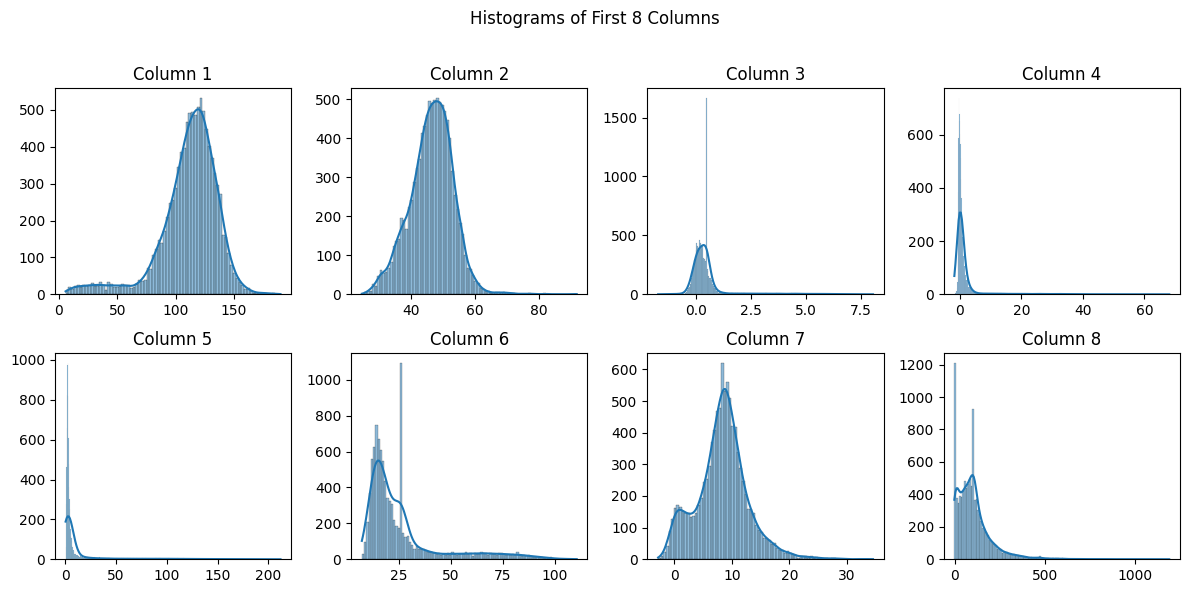

In [283]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
fig.suptitle('Histograms of First 8 Columns')

# Loop through the first 8 columns and create histograms
for i, column in enumerate(df.columns[:8]):
    row, col = i // 4, i % 4  # Calculate the row and column for the subplot
    ax = axes[row, col]  # Get the corresponding axis

    sns.histplot(df[column], kde=True, ax=ax)
    ax.set_title(f'Column {i+1}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plot
plt.show()

In [284]:
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,114.859375,41.452672,0.188914,0.591629,2.579431,16.024319,9.183242,105.904593,0.0
1,98.406250,51.290752,0.421885,-0.158079,3.683946,23.996595,7.378554,57.771480,0.0
2,110.359375,42.741544,0.477388,0.538841,3.418896,19.090287,7.527202,67.811225,0.0
3,133.960938,48.455908,-0.289046,0.093911,1.377090,11.289180,13.631908,105.928268,0.0
4,100.109375,44.539350,0.441861,0.350467,8.473244,32.343502,4.532549,22.332795,0.0
...,...,...,...,...,...,...,...,...,...
9995,122.976562,48.277108,-0.027160,-0.080098,5.120401,28.763490,5.867339,34.484277,0.0
9996,110.257812,58.110784,0.132559,-0.750325,2.829431,18.674093,9.247513,98.431192,0.0
9997,113.062500,48.387716,0.019552,-0.362260,0.352843,8.201329,27.385053,804.482706,0.0
9998,123.765625,41.959706,-0.120701,0.379044,7.254181,35.665727,4.990392,24.090195,0.0


### Testing Normalization

In [285]:
df_normalized = (df - df.min().min()) / (df.max().max() - df.min().min())
df_normalized

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,0.098568,0.037079,0.002514,0.002851,0.004516,0.015779,0.010048,0.091067,0.002356
1,0.084786,0.045320,0.002709,0.002223,0.005442,0.022457,0.008536,0.050748,0.002356
2,0.094799,0.038158,0.002756,0.002807,0.005220,0.018347,0.008661,0.059158,0.002356
3,0.114568,0.042945,0.002114,0.002434,0.003509,0.011812,0.013775,0.091087,0.002356
4,0.086213,0.039664,0.002726,0.002649,0.009453,0.029448,0.006152,0.021063,0.002356
...,...,...,...,...,...,...,...,...,...
9995,0.105367,0.042795,0.002333,0.002289,0.006645,0.026450,0.007271,0.031242,0.002356
9996,0.094713,0.051032,0.002467,0.001727,0.004726,0.017998,0.010102,0.084807,0.002356
9997,0.097063,0.042888,0.002372,0.002052,0.002651,0.009226,0.025295,0.676232,0.002356
9998,0.106028,0.037503,0.002255,0.002673,0.008432,0.032231,0.006536,0.022535,0.002356


In [286]:
df_normalized.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.095422,0.041314,0.002756,0.003847,0.012970,0.024397,0.009346,0.091087,0.002432
std,0.021478,0.005694,0.000828,0.005214,0.024843,0.015659,0.003790,0.087496,0.000241
min,0.007225,0.023106,0.000900,0.000855,0.002534,0.008530,0.000000,0.000700,0.002356
25%,0.087022,0.037841,0.002404,0.002198,0.003953,0.014715,0.007236,0.034603,0.002356
50%,0.098794,0.041670,0.002600,0.002529,0.004681,0.018743,0.009449,0.076378,0.002356
75%,0.108751,0.045052,0.002756,0.003130,0.006876,0.024474,0.011349,0.116673,0.002356
max,0.161287,0.079259,0.009115,0.059401,0.179895,0.095035,0.031288,1.000000,0.003193


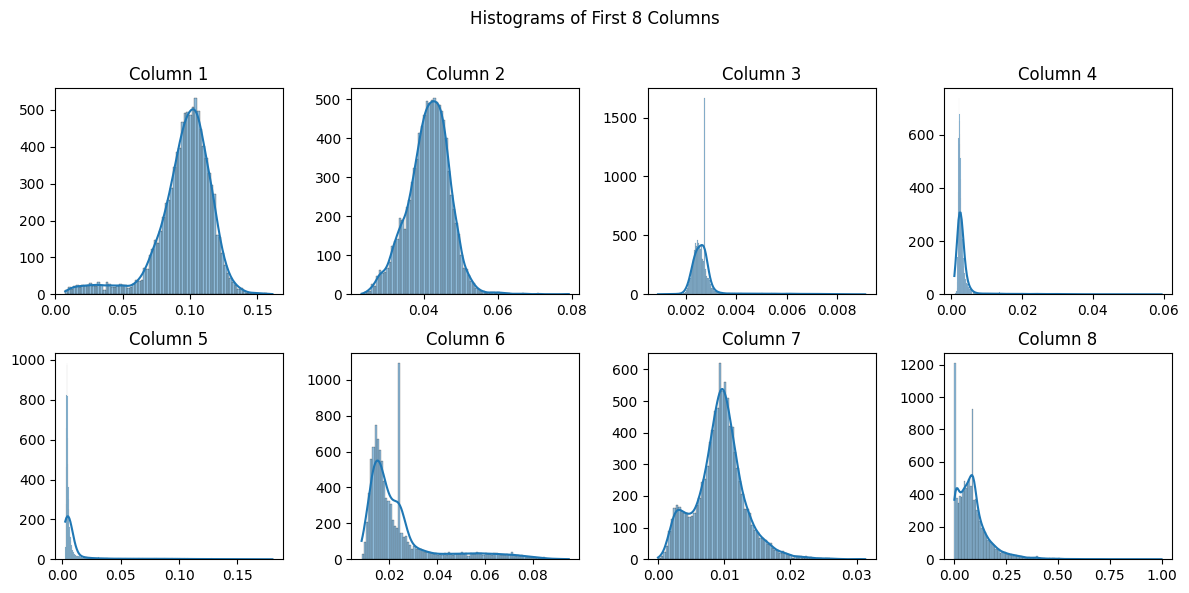

In [287]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
fig.suptitle('Histograms of First 8 Columns')

# Loop through the first 8 columns and create histograms
for i, column in enumerate(df_normalized.columns[:8]):
    row, col = i // 4, i % 4  # Calculate the row and column for the subplot
    ax = axes[row, col]  # Get the corresponding axis

    sns.histplot(df_normalized[column], kde=True, ax=ax)
    ax.set_title(f'Column {i+1}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plot
plt.show()

### Testing Standardization

In [288]:
df_standardized = (df - df.mean()) / df.std()
df_standardized

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,0.146499,-0.743852,-2.917034e-01,-0.190893,-0.340267,-0.550401,0.185229,-2.266596e-04,-0.316768
1,-0.495189,0.703334,-5.612405e-02,-0.311346,-0.303026,-0.123926,-0.213640,-4.610328e-01,-0.316768
2,-0.029006,-0.554258,8.827727e-10,-0.199374,-0.311963,-0.386388,-0.180786,-3.649165e-01,-0.316768
3,0.891478,0.286327,-7.750134e-01,-0.270860,-0.380806,-0.803706,1.168467,-2.644243e-11,-0.316768
4,-0.428766,-0.289800,-3.592510e-02,-0.229640,-0.141544,0.322590,-0.842659,-8.003078e-01,-0.316768
...,...,...,...,...,...,...,...,...,...
9995,0.463077,0.260026,-5.101965e-01,-0.298817,-0.254593,0.131078,-0.547646,-6.839746e-01,-0.316768
9996,-0.032967,1.706564,-3.486890e-01,-0.406501,-0.331838,-0.408652,0.199434,-7.177384e-02,-0.316768
9997,0.076419,0.276296,-4.629616e-01,-0.344151,-0.415341,-0.968890,4.208165,6.687666e+00,-0.316768
9998,0.493851,-0.669267,-6.047841e-01,-0.225048,-0.182648,0.500311,-0.741468,-7.834832e-01,-0.316768


In [289]:
df_standardized.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,2.437162e-16,-4.838796e-16,0.000000e+00,-2.131628e-17,1.136868e-17,-7.247536e-17,-1.762146e-16,-1.556089e-16,5.542233e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.106433e+00,-3.197580e+00,-2.240209e+00,-5.738449e-01,-4.200492e-01,-1.013339e+00,-2.466018e+00,-1.033039e+00,-3.167682e-01
25%,-3.910595e-01,-6.100565e-01,-4.242231e-01,-3.161581e-01,-3.629612e-01,-6.182986e-01,-5.567747e-01,-6.455526e-01,-3.167682e-01
50%,1.570105e-01,6.244606e-02,-1.876919e-01,-2.526825e-01,-3.336560e-01,-3.610881e-01,2.712819e-02,-1.681046e-01,-3.167682e-01
75%,6.206038e-01,6.562840e-01,8.827727e-10,-1.373552e-01,-2.452893e-01,4.888747e-03,5.285412e-01,2.924312e-01,-3.167682e-01
max,3.066695e+00,6.663531e+00,7.677123e+00,1.065573e+01,6.719084e+00,4.511161e+00,5.789506e+00,1.038803e+01,3.156567e+00


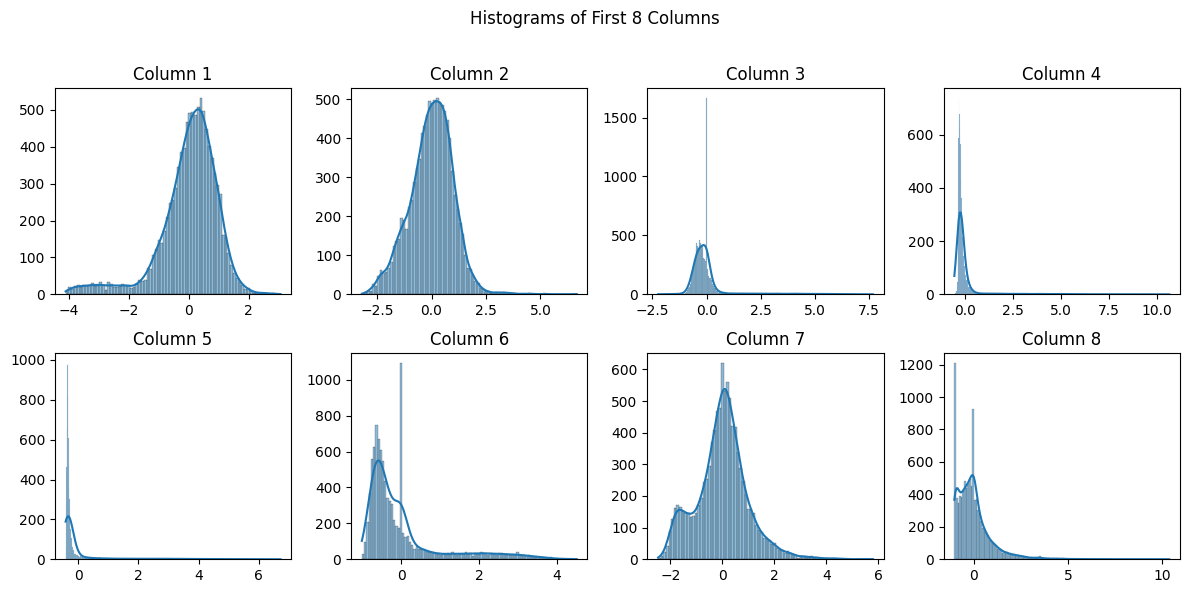

In [290]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
fig.suptitle('Histograms of First 8 Columns')

# Loop through the first 8 columns and create histograms
for i, column in enumerate(df_standardized.columns[:8]):
    row, col = i // 4, i % 4  # Calculate the row and column for the subplot
    ax = axes[row, col]  # Get the corresponding axis

    sns.histplot(df_standardized[column], kde=True, ax=ax)
    ax.set_title(f'Column {i+1}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plot
plt.show()

### Implementation

In [291]:
df = (df - df.min().min()) / (df.max().max() - df.min().min())
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,0.098568,0.037079,0.002514,0.002851,0.004516,0.015779,0.010048,0.091067,0.002356
1,0.084786,0.045320,0.002709,0.002223,0.005442,0.022457,0.008536,0.050748,0.002356
2,0.094799,0.038158,0.002756,0.002807,0.005220,0.018347,0.008661,0.059158,0.002356
3,0.114568,0.042945,0.002114,0.002434,0.003509,0.011812,0.013775,0.091087,0.002356
4,0.086213,0.039664,0.002726,0.002649,0.009453,0.029448,0.006152,0.021063,0.002356
...,...,...,...,...,...,...,...,...,...
9995,0.105367,0.042795,0.002333,0.002289,0.006645,0.026450,0.007271,0.031242,0.002356
9996,0.094713,0.051032,0.002467,0.001727,0.004726,0.017998,0.010102,0.084807,0.002356
9997,0.097063,0.042888,0.002372,0.002052,0.002651,0.009226,0.025295,0.676232,0.002356
9998,0.106028,0.037503,0.002255,0.002673,0.008432,0.032231,0.006536,0.022535,0.002356


### Explaination/Justification

Text

## Task 3: Which Evaluation Measure and Why?

Text

## Task 4: Classifier Comparison

### Splitting into Test and Train Sets

In [347]:
x = df.drop(columns = ['target_class']) #Setting x as the dataframe without our target feature
y = df['target_class'] #Setting y to our target feature
y = pd.DataFrame(y) #Creating a dataframe from that Pandas series
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) #Splitting into training and test sets

In [348]:
#Encoding Labels 
lab = LabelEncoder() #Defining the label encodder as lab
y_train = lab.fit_transform(y_train) 
y_test = lab.fit_transform(y_test)

/home/g2square/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/g2square/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Decision Tree Classifier

In [295]:
dtc_1 = DecisionTreeClassifier(criterion='entropy', max_depth=3) #Creating a Decision Tree Classifier as dtc_1
dtc_1.fit(X_train, y_train) #Feeding our Training sets to dtc_1

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [296]:
dtc_y_predicted_train = dtc_1.predict(X_train) #Calculating a prediction of the training set
dtc_train_f1 = f1_score(y_train, dtc_y_predicted_train) #Finding F Score
dtc_train_f1

0.8771407297096053

In [297]:
dtc_y_predicted_test = dtc_1.predict(X_test)
dtc_test_f1 = f1_score(y_test, dtc_y_predicted_test)
dtc_test_f1

0.8546255506607928

### kNN Classifier

In [298]:
knn_1 = KNeighborsClassifier() #Defining a KNN Classifer as knn_1
knn_1.fit(X_train, y_train) #Feeding our training sets to knn_1

KNeighborsClassifier()

In [299]:
#Training F Score
knn_y_predicted_train = knn_1.predict(X_train) 
knn_train_f1 = f1_score(y_train, knn_y_predicted_train)
knn_train_f1

0.8739095955590802

In [300]:
#Test F Score
knn_y_predicted_test = knn_1.predict(X_test)
knn_test_f1 = f1_score(y_test, knn_y_predicted_test)
knn_test_f1

0.8477751756440282

### SVM Classifier (Linear Kernel)

In [301]:
linear_svc_1 = SVC(kernel='linear', C=1) #Defining a linear SVM classiifer as linear_svc_1
linear_svc_1.fit(X_train, y_train) #Feed in our training sets 

SVC(C=1, kernel='linear')

In [302]:
#Training F Score
linear_train_f1_1 = f1_score(y_train, linear_svc_1.predict(X_train)) 
linear_train_f1_1

0.6838586437440307

In [303]:
#Test F Score
linear_test_f1_1 = f1_score(y_test, linear_svc_1.predict(X_test))
linear_test_f1_1

0.6946778711484594

### SVM Classifier (Poly Kernel)

In [304]:
poly_svc_1 = SVC(kernel='poly', degree=3, C=1) #Defining a linear SVM classiifer as poly_svc_1
poly_svc_1.fit(X_train, y_train) #Feeding in our training sets 

SVC(C=1, kernel='poly')

In [305]:
#Training F Score
poly_train_f1_1 = f1_score(y_train, poly_svc_1.predict(X_train))
poly_train_f1_1

0.8325281803542672

In [306]:
#Test F Score
poly_test_f1_1 = f1_score(y_test, poly_svc_1.predict(X_test))
poly_test_f1_1

0.8260869565217391

### SVM Classifier (RBF Kernel)

In [307]:
rbf_svc_1 = SVC(kernel='rbf', C=1) #RBF classifier defined
rbf_svc_1.fit(X_train, y_train) #Training sets fed

SVC(C=1)

In [308]:
#Training F Score
rbf_train_f1_1 = f1_score(y_train, rbf_svc_1.predict(X_train))
rbf_train_f1_1

0.8231404958677685

In [309]:
#Test F Score
rbf_test_f1_1 = f1_score(y_test, rbf_svc_1.predict(X_test))
rbf_test_f1_1

0.8206388206388205

### SVM Classifier (Sigmoid Kernel)

In [310]:
sig_svc_1 = SVC(kernel='sigmoid', C=1) #Sigmoid SVC classsifer defiined
sig_svc_1.fit(X_train, y_train) #Training sets fed

SVC(C=1, kernel='sigmoid')

In [311]:
#Training F Score
sig_train_f1_1 = f1_score(y_train, sig_svc_1.predict(X_train))
sig_train_f1_1

0.476831091180867

In [312]:
#Test F Score
sig_test_f1_1 = f1_score(y_test, sig_svc_1.predict(X_test))
sig_test_f1_1

0.4913043478260869

### Winner Classifier

In [380]:
#Creating a dictionary of our calculated scores for the 6 classifiers 
scores_dict = {
    "Decision Tree Training Set F Score": dtc_train_f1,
    "Decision Tree Test Set F Score": dtc_test_f1,
    "kNN Training Set F Score": knn_train_f1,
    "kNN Test Set F Score": knn_test_f1,
    "SVM-Linear Training Set F Score": linear_train_f1_1,
    "SVM-Linear Test Set F Score": linear_test_f1_1,
    "SVM-Poly Training Set F Score": poly_train_f1_1,
    "SVM-Poly Test Set F Score": poly_test_f1_1,
    "SVM-RBF Training Set F Score": rbf_train_f1_1,
    "SVM-RBF Test Set F Score": rbf_test_f1_1,
    "SVM-Sigmoid Training Set F Score": sig_train_f1_1,
    "SVM-Sigmoid Test Set F Score": sig_test_f1_1
}

count = 1 #Setting order count to start at 1 (I am american)

sorted_data = dict(sorted(scores_dict.items(), key=lambda item: item[1], reverse=True)) #Sorting output scores in descending order

#Printing out dictionary
for title, value in sorted_data.items():
    print(f"{count} {title}: {value}")
    count += 1

1 Decision Tree Training Set F Score: 0.8771407297096053
2 kNN Training Set F Score: 0.8739095955590802
3 Decision Tree Test Set F Score: 0.8546255506607928
4 kNN Test Set F Score: 0.8477751756440282
5 SVM-Poly Training Set F Score: 0.8325281803542672
6 SVM-Poly Test Set F Score: 0.8260869565217391
7 SVM-RBF Training Set F Score: 0.8231404958677685
8 SVM-RBF Test Set F Score: 0.8206388206388205
9 SVM-Linear Test Set F Score: 0.6946778711484594
10 SVM-Linear Training Set F Score: 0.6838586437440307
11 SVM-Sigmoid Test Set F Score: 0.4913043478260869
12 SVM-Sigmoid Training Set F Score: 0.476831091180867


### Discussion:



## Task 5: Discriminative Features

### Identify Top/Bottom 3 Discriminative Features

In [314]:
df.var().sort_values(ascending=False) #DF variance shows us a variance calculation applied to our dataframe

Skewness of the DM-SNR curve                    7.655590e-03
Mean of the DM-SNR curve                        6.171984e-04
Mean of the integrated profile                  4.612930e-04
Standard deviation of the DM-SNR curve          2.451911e-04
Standard deviation of the integrated profile    3.242645e-05
Skewness of the integrated profile              2.718155e-05
Excess kurtosis of the DM-SNR curve             1.436383e-05
Excess kurtosis of the integrated profile       6.862115e-07
target_class                                    5.816126e-08
dtype: float64

In [315]:
df_top_3 = df.copy() #Copy original dataframe
df_top_3 = df_top_3[['Skewness of the DM-SNR curve', 'Mean of the DM-SNR curve', 'Mean of the integrated profile', 'target_class']] #Load above 3 top features by variance
df_top_3

,Skewness of the DM-SNR curve,Mean of the DM-SNR curve,Mean of the integrated profile,target_class
0,0.091067,0.004516,0.098568,0.002356
1,0.050748,0.005442,0.084786,0.002356
2,0.059158,0.005220,0.094799,0.002356
3,0.091087,0.003509,0.114568,0.002356
4,0.021063,0.009453,0.086213,0.002356
...,...,...,...,...
9995,0.031242,0.006645,0.105367,0.002356
9996,0.084807,0.004726,0.094713,0.002356
9997,0.676232,0.002651,0.097063,0.002356
9998,0.022535,0.008432,0.106028,0.002356


In [316]:
df_bottom_3 = df.copy() 
df_bottom_3 = df_bottom_3[['Skewness of the integrated profile', 'Excess kurtosis of the DM-SNR curve', 'Excess kurtosis of the integrated profile', 'target_class']] #Load bottom 3 features b y variance
df_bottom_3

,Skewness of the integrated profile,Excess kurtosis of the DM-SNR curve,Excess kurtosis of the integrated profile,target_class
0,0.002851,0.010048,0.002514,0.002356
1,0.002223,0.008536,0.002709,0.002356
2,0.002807,0.008661,0.002756,0.002356
3,0.002434,0.013775,0.002114,0.002356
4,0.002649,0.006152,0.002726,0.002356
...,...,...,...,...
9995,0.002289,0.007271,0.002333,0.002356
9996,0.001727,0.010102,0.002467,0.002356
9997,0.002052,0.025295,0.002372,0.002356
9998,0.002673,0.006536,0.002255,0.002356


### SVM Classification of Top 3 Discriminative Features

In [317]:
x_top_3 = df_top_3.copy() #Creating an X for the top 3 
y_top_3 = df_top_3['target_class'] #Creating the y for the target feature from the top 3
y_top_3 = pd.DataFrame(y_top_3) #Creating dataframe of that pandas series
X_train_top_3, X_test_top_3, y_train_top_3, y_test_top_3 = train_test_split(x_top_3, y_top_3, test_size=0.25, random_state=42) #Splitting into training and test set

In [318]:
#Encoding Labels
y_train_top_3 = lab.fit_transform(y_train_top_3)
y_test_top_3 = lab.fit_transform(y_test_top_3)

/home/g2square/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/g2square/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [319]:
#SVM: Linear
linear_svc_2 = SVC(kernel='linear', C=1) 
linear_svc_2.fit(X_train_top_3, y_train_top_3)
linear_train_f1_2 = f1_score(y_train_top_3, linear_svc_2.predict(X_train_top_3))
print(linear_train_f1_2)
linear_test_f1_2 = f1_score(y_test_top_3, linear_svc_2.predict(X_test_top_3))
print(linear_test_f1_2)

0.6717998075072185
0.6761363636363636


In [320]:
#SVM: Poly
poly_svc_2 = SVC(kernel='poly', degree=3, C=1)
poly_svc_2.fit(X_train_top_3, y_train_top_3)
poly_train_f1_2 = f1_score(y_train_top_3, poly_svc_2.predict(X_train_top_3))
print(poly_train_f1_2)
poly_test_f1_2 = f1_score(y_test_top_3, poly_svc_2.predict(X_test_top_3))
print(poly_test_f1_2)

0.8390166534496433
0.8365384615384616


In [321]:
#SVM: RBF
rbf_svc_2 = SVC(kernel='rbf', C=1)
rbf_svc_2.fit(X_train_top_3, y_train_top_3)
rbf_train_f1_2 = f1_score(y_train_top_3, rbf_svc_2.predict(X_train_top_3))
print(rbf_train_f1_2)
rbf_test_f1_2 = f1_score(y_test_top_3, rbf_svc_2.predict(X_test_top_3))
print(rbf_test_f1_2)

0.8265139116202946
0.8255528255528256


In [322]:
#SVM: Sigmoid
sig_svc_2 = SVC(kernel='sigmoid', C=1)
sig_svc_2.fit(X_train_top_3, y_train_top_3)
sig_train_f1_2 = f1_score(y_train_top_3, sig_svc_2.predict(X_train_top_3))
print(sig_train_f1_2)
sig_test_f1_2 = f1_score(y_test_top_3, sig_svc_2.predict(X_test_top_3))
print(sig_test_f1_2)

0.5034324942791761
0.5277161862527716


### SVM Classification of Bottom 3 Discriminative Features

In [323]:
x_bot_3 = df_bottom_3.copy()
y_bot_3 = df_bottom_3['target_class']
y_bot_3 = pd.DataFrame(y_bot_3)
X_train_bot_3, X_test_bot_3, y_train_bot_3, y_test_bot_3 = train_test_split(x_bot_3, y_bot_3, test_size=0.25, random_state=42)

In [324]:
y_train_bot_3 = lab.fit_transform(y_train_bot_3)
y_test_bot_3 = lab.fit_transform(y_test_bot_3)

/home/g2square/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/g2square/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [325]:
#SVM: Linear
linear_svc_3 = SVC(kernel='linear', C=100)
linear_svc_3.fit(X_train_bot_3, y_train_bot_3)
linear_train_f1_3 = f1_score(y_train_bot_3, linear_svc_3.predict(X_train_bot_3))
print(linear_train_f1_3)
linear_test_f1_3 = f1_score(y_test_bot_3, linear_svc_3.predict(X_test_bot_3))
print(linear_test_f1_3)

0.7361623616236164
0.73224043715847


In [326]:
#SVM: Poly
poly_svc_3 = SVC(kernel='poly', degree=3, C=1)
poly_svc_3.fit(X_train_bot_3, y_train_bot_3)
poly_train_f1_3 = f1_score(y_train_bot_3, poly_svc_3.predict(X_train_bot_3))
print(poly_train_f1_3)
poly_test_f1_3 = f1_score(y_test_bot_3, poly_svc_3.predict(X_test_bot_3))
print(poly_test_f1_3)

0.9827973074046372
0.9846827133479212


In [327]:
#SVM: RBF
rbf_svc_3 = SVC(kernel='rbf', C=1)
rbf_svc_3.fit(X_train_bot_3, y_train_bot_3)
rbf_train_f1_3 = f1_score(y_train_bot_3, rbf_svc_3.predict(X_train_bot_3))
print(rbf_train_f1_3)
rbf_test_f1_3 = f1_score(y_test_bot_3, rbf_svc_3.predict(X_test_bot_3))
print(rbf_test_f1_3)

0.9941089837997055
0.9978401727861772


In [328]:
#SVM: Sigmoid
sig_svc_3 = SVC(kernel='sigmoid', C=1)
sig_svc_3.fit(X_train_bot_3, y_train_bot_3)
sig_train_f1_3 = f1_score(y_train_bot_3, sig_svc_3.predict(X_train_bot_3))
print(sig_train_f1_3)
sig_test_f1_3 = f1_score(y_test_bot_3, sig_svc_3.predict(X_test_bot_3))
print(sig_test_f1_3)

0.6034612490594432
0.6031042128603104


### Sorting Classifiers

In [379]:
#Creating dictionary of each of the above f-scores calculated from their respective classifer 
top_3scores_dict = {
    "SVM-Linear TOP 3 Training Set F Score": linear_train_f1_2,
    "SVM-Linear TOP 3 Test Set F Score": linear_test_f1_2,
    "SVM-Poly TOP 3 Training Set F Score": poly_train_f1_2,
    "SVM-Poly TOP 3 Test Set F Score": poly_test_f1_2,
    "SVM-RBF TOP 3 Training Set F Score": rbf_train_f1_2,
    "SVM-RBF TOP 3 Test Set F Score": rbf_test_f1_2,
    "SVM-Sigmoid TOP 3 Training Set F Score": sig_train_f1_2,
    "SVM-Sigmoid TOP 3 Test Set F Score": sig_test_f1_2,
    "SVM-Linear BOTTOM 3 Training Set F Score": linear_train_f1_3,
    "SVM-Linear BOTTOM 3 Test Set F Score": linear_test_f1_3,
    "SVM-Poly BOTTOM 3 Training Set F Score": poly_train_f1_3,
    "SVM-Poly BOTTOM 3 Test Set F Score": poly_test_f1_3,
    "SVM-RBF BOTTOM 3 Training Set F Score": rbf_train_f1_3,
    "SVM-RBF BOTTOM 3 Test Set F Score": rbf_test_f1_3,
    "SVM-Sigmoid BOTTOM 3 Training Set F Score": sig_train_f1_3,
    "SVM-Sigmoid BOTTOM 3 Test Set F Score": sig_test_f1_3
}
count = 1 #Setting order count to start at 1 (I am american)
sorted_data = dict(sorted(top_3scores_dict.items(), key=lambda item: item[1], reverse=True)) #Sorting descending order
#Printing dictionary out
for title, value in sorted_data.items(): 
    print(f"{count} {title}: {value}")
    count += 1

1 SVM-RBF BOTTOM 3 Test Set F Score: 0.9978401727861772
2 SVM-RBF BOTTOM 3 Training Set F Score: 0.9941089837997055
3 SVM-Poly BOTTOM 3 Test Set F Score: 0.9846827133479212
4 SVM-Poly BOTTOM 3 Training Set F Score: 0.9827973074046372
5 SVM-Poly TOP 3 Training Set F Score: 0.8390166534496433
6 SVM-Poly TOP 3 Test Set F Score: 0.8365384615384616
7 SVM-RBF TOP 3 Training Set F Score: 0.8265139116202946
8 SVM-RBF TOP 3 Test Set F Score: 0.8255528255528256
9 SVM-Linear BOTTOM 3 Training Set F Score: 0.7361623616236164
10 SVM-Linear BOTTOM 3 Test Set F Score: 0.73224043715847
11 SVM-Linear TOP 3 Test Set F Score: 0.6761363636363636
12 SVM-Linear TOP 3 Training Set F Score: 0.6717998075072185
13 SVM-Sigmoid BOTTOM 3 Training Set F Score: 0.6034612490594432
14 SVM-Sigmoid BOTTOM 3 Test Set F Score: 0.6031042128603104
15 SVM-Sigmoid TOP 3 Test Set F Score: 0.5277161862527716
16 SVM-Sigmoid TOP 3 Training Set F Score: 0.5034324942791761


### Discussion 

The top scores of the dictionary we output in Task 4 were all either DCT or kNN (two classifiers we didn't do in task), I will compare this output dictionary to rows starting in 5 in the previous task. It follows the same trend of RBF and POLY being the top 2 SVM classifiers and LINEAR and SIGMOID being less accurate. 

## Task 6: Identify the Most Discriminating to predict the binary outcome of the dataset using one wrapper feature selection technique

In [377]:
#DTC
model_dtc = DecisionTreeClassifier() #Defining DTC as model to be used
rfe = RFE(model_dtc, n_features_to_select=3) #Setting rfe variable to the RFE of our model with 3 selected features
rfe = rfe.fit(X_train, y_train) #Fitting the RFE with our X and y training
rfe_dtc_top = X_train.columns[rfe.support_] #Loading columns
X_train_selected = X_train[rfe_dtc_top] 
X_test_selected = X_test[rfe_dtc_top]
X_train_selected.columns

Index(['Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve'],
      dtype='object')

In [376]:
#SVM Linear
model_linear = SVC(kernel='linear', C=1) #Defining SVM Linear as model to be used
rfe = RFE(model_linear, n_features_to_select=3)
rfe = rfe.fit(X_train, y_train)
rfe_dtc_top = X_train.columns[rfe.support_]
X_train_selected = X_train[rfe_dtc_top]
X_test_selected = X_test[rfe_dtc_top]
X_train_selected.columns

Index(['Mean of the integrated profile', 'Skewness of the integrated profile',
       'Standard deviation of the DM-SNR curve'],
      dtype='object')

### Discussion

Unfortunately, I was only able to run two different classifiers (out of original 6) with this feature selection method (RFE) due to receiving an error I did not fix (relating to coef_ and feature_importances_). 

These two feature selection methods provided us with their top 3 selected features, similarly to in Task 5 how we chose discriminative features by sorting the output of a variance method. 

First, they each read in their respective model (either DCT or SVM:Linear in this case). Then, the wrapper feature selection technique I chose (Recrusive Feature Elimination) was fed the model and an input number of features to select (3 as in the top 3 we did in task 5). 
After that, it is fit with the training sets from X and y as defined previously along with needed columsn. Then the final dataframes of selected features are loaded and we can see that the the top 3 features from the Decision Tree Classifier and RFE are: 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', and 'Mean of the DM-SNR curve'. The top 3 features from the SVM:Linear classifer are 'Mean of the integrated profile', 'Skewness of the integrated profile', 'Standard deviation of the DM-SNR curve'. 

Mean of the DM-SNR curve and Mean of the integrated profile are both found in the features found in Task 5. 

## Task 7:

## Task 8:

## Task 9:

### Correlation between Various Features with the Target Class

### Feature Selection and Feature Importance

### Relative Performance of Different Classifiers

### Effect of different ways of imputing missing values on the ﬁnal performance of different classiﬁers